# Workshop II - Swarm Intelligence and Sinergy: Ant Colony for the Traveling Salesman Problem

## Workshop Definition:

In this second workshop, the idea is you solve the _Traveling Salesman Problem (TSP)_ using _Ant Colony Optimization (ACO)_ algorithm. It is time to apply a very popular swarm intelligence algorithm to a problem in the real world.

Imagine you have been hired as __artificial intelligence engineer__ in an important logistic company. Your boss, a Chief Technology Officer, wants to get _shortest path_ to deliver some products. You analyze the problem, and figure out it is similar to _TSP_, and you remember you know some _swarm intellinge_ algoritms useful to solve this problem, in this case, _ACO_.

Here you will have some tasks in order to complete this _workshop_:

1. Create some diagrams and explanations to represent/understand the problem following a _systems thinking approach_.
1. Generate several random $3D$ space points in order to define cities to be visited by the salesman.
1. With random points, generate a list in order to define the requirements for the route.
1. Implement ACO in order to solve TSP problem. Test different parameters combination.
1. Draw a $3D$ plot in order to see the output of the algorithm.
1. Think some conclusions based on outputs analysis.

Write any technical concern/decision/difficulty  you think is relevant regarding your work. You must deliver a full report detailing each one of the previous steps. I strongly recommend you to use a _Jupyter Notebook_ or a _COLAB_ to write/execute your code. Also, your work must include the __report__, the __code__, and a __README.md__ file in repo of the course, everything in a folder called _workshop\_2_.

In [1]:
!pip install numpy
!pip install matplotlib


[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


## Traveling Salesman Problem

Traveling Salesman Problem (TSP) is a pretty common combinatorial optimization problem. The general idea is a salesman must to visit a set of cities exactly once and return to thr original city. The goal is to get the shortest possible route starting on a specific city.

Thinks in all possible combinations, specially when the number of cities growth, it becomes this problem a _NP-Hard_. 

In [2]:
import numpy as np


def generate_cities(number_cities: int) -> list:
    """
    This function generates a list of cities with random coordinates in 3D space.

    Parameters:
    - number_cities (int): Number of cities to generate.

    Returns:
    - list: A list of cities with random coordinates.
    """
    cities = np.random.random((number_cities, 3))
    return cities


def calculate_distance(point_1: np.array, point_2: np.array) -> float:
    """
    This function calculates the Euclidean distance between two points.

    Parameters:
    - point_1 (np.array): First point.
    - point_2 (np.array): Second point.

    Returns:
    - float: The Euclidean distance between the two points.
    """
    distace = np.sqrt(np.sum((point_1 - point_2) ** 2))
    return distace

## Ant Colony Optimization (ACO)

Ant Colony Optimization is an algorithm based on ants behaviors to find routes to food using pheromones as a guide of the best way. This is an algorithm simple to implement but get incredible results in route optimization problems.

The idea is the way with most pheromone t is the better way to accomplished the route. 

In [10]:
def ant_colony_optimization(
    cities, n_ants, n_iterations, alpha, beta, evaporation_rate, Q
):
    """
    This function solves the Traveling Salesman Problem using Ant Colony Optimization.

    Parameters:
    - cities (list): List of cities.
    - n_ants (int): Number of ants.
    - n_iterations (int): Number of iterations.
    - alpha (float): It determines how much the ants are influenced by the pheromone trails left by other ants.
    - beta (float):  It determines how much the ants are influenced by the distance to the next city
    - evaporation_rate (float): Evaporation rate.
    - Q (float): It determines the intensity of the pheromone trail left behind by an ant.
    """

    number_cities = len(cities)
    pheromone = np.ones((number_cities, number_cities))

    # initialize output metrics
    best_path = None
    best_path_length = np.inf

    # per each iteration the ants will build a path
    for iteration in range(n_iterations):
        paths = []  # store the paths of each ant
        path_lengths = []

        for ant in range(n_ants):
            visited = [False] * number_cities

            # you could start from any city, but let's start from a random one
            current_city = np.random.randint(number_cities)
            visited[current_city] = True
            path = [current_city]
            path_length = 0

            while False in visited:  # while there are unvisited cities
                unvisited = np.where(np.logical_not(visited))[0]
                probabilities = np.zeros(len(unvisited))

                # based on pheromone, distance and alpha and beta parameters, define the preference
                # for an ant to move to a city
                for i, unvisited_city in enumerate(unvisited):
                    distance = calculate_distance(cities[current_city], cities[unvisited_city])
                    probabilities[i] = (
                        pheromone[current_city, unvisited_city] * alpha
                    ) - (distance * beta)

                # normalize probabilities, it means, the sum of all probabilities is 1
                probabilities /= (np.max(probabilities) - np.min(probabilities))
                probabilities += np.abs(0 - np.min(probabilities))
                probabilities /= np.sum(probabilities)

                next_city = np.random.choice(unvisited, p=probabilities)
                path.append(next_city)
                # increase the cost of move through the path
                path_length += calculate_distance(
                    cities[current_city], cities[next_city]
                )
                visited[next_city] = True
                # move to the next city, for the next iteration
                current_city = next_city

            paths.append(path)
            path_lengths.append(path_length)

            # update with current best path, this is a minimization problem
            if path_length < best_path_length:
                best_path = path
                best_path_length = path_length

        # remove a bit of pheromone of all map, it's a way to avoid local minima
        pheromone *= evaporation_rate

        # current ant must add pheromone to the path it has walked
        for path, path_length in zip(paths, path_lengths):
            for i in range(number_cities - 1):
                pheromone[path[i], path[i + 1]] += Q / path_length
            pheromone[path[-1], path[0]] += Q / path_length
    return best_path, best_path_length

Once we have basic functions related to _cities_ and _aco_, it is moment to run the algorithm creating first the list of cities and then calculating the best path.

In [11]:
# model parameters
number_cities = 50  #  [10,20,30,40,50]
number_ants = 100
number_iterations = 100
alpha = 1
beta = 1
evaporation_rate = 0.5
Q = 1

# HERE create list of cities
cities = generate_cities(number_cities)

# HERE call ant_colony_optimization function
best_path, best_path_length = ant_colony_optimization(
    cities, number_ants, number_iterations, alpha, beta, evaporation_rate, Q
)

/tmp/ipykernel_905622/3646035445.py:51: RuntimeWarning: divide by zero encountered in divide
  probabilities /= (np.max(probabilities) - np.min(probabilities))
/tmp/ipykernel_905622/3646035445.py:53: RuntimeWarning: invalid value encountered in divide
  probabilities /= np.sum(probabilities)


ValueError: probabilities contain NaN

It is important to generate great visualizations in order to make simple your analysis. For this purpose, for any experiment the idea is to make a $3D$ plot (in this case using _matplotlib_) and print some metrics. 

Best path: [43, 32, 37, 31, 20, 30, 34, 18, 6, 25, 16, 47, 11, 14, 23, 26, 28, 1, 36, 33, 2, 13, 27, 17, 15, 3, 0, 22, 35, 12, 45, 19, 7, 24, 5, 44, 9, 46, 38, 21, 39, 40, 42, 41, 10, 48, 49, 8, 29, 4]
Best path length: 28.196483327218726


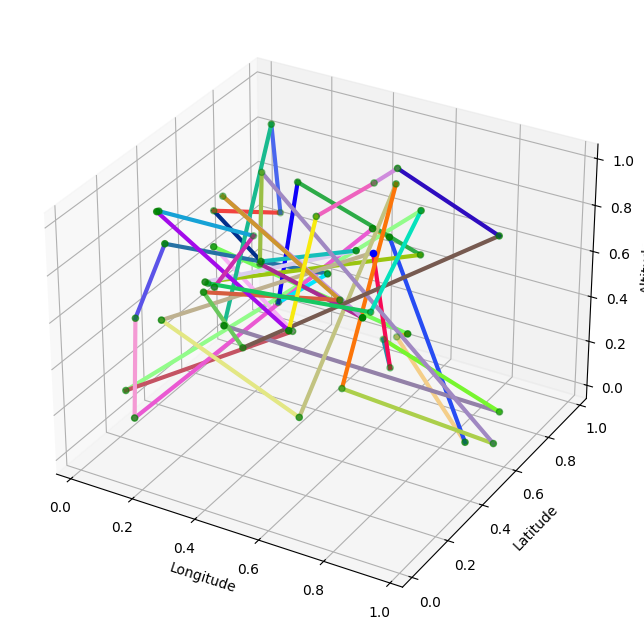

In [6]:
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def random_color() -> list:
    """
    This function generates a random color in RGB porcentage intensity.

    Returns:
    - list: A list with three random values between 0 and 1.
    """
    return [random.random(), random.random(), random.random()]


def plot_aco_route(cities: np.array, best_path: list):
    """
    This function plots the cities and the best path found by the ACO algorithm.

    Parameters:
    - cities (np.array): A list of cities with their coordinates.
    - best_path (list): The best path found by the ACO algorithm.
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")

    for i in range(len(best_path) - 1):
        ax.plot(
            [cities[best_path[i], 0], cities[best_path[i + 1], 0]],  # x axis
            [cities[best_path[i], 1], cities[best_path[i + 1], 1]],  # y axis
            [cities[best_path[i], 2], cities[best_path[i + 1], 2]],  # z axis
            c=random_color(),
            linestyle="-",
            linewidth=3,
        )

    ax.plot(
        [cities[best_path[0], 0], cities[best_path[-1], 0]],
        [cities[best_path[0], 1], cities[best_path[-1], 1]],
        [cities[best_path[0], 2], cities[best_path[-1], 2]],
        c=random_color(),
        linestyle="-",
        linewidth=3,
    )

    ax.scatter(cities[0, 0], cities[0, 1], cities[0, 2], c="b", marker="o")
    ax.scatter(cities[1:, 0], cities[1:, 1], cities[1:, 2], c="g", marker="o")

    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_zlabel("Altitude")
    plt.show()


print("Best path:", best_path)
print("Best path length:", best_path_length)
plot_aco_route(cities, best_path)

In [14]:
population_size = 50
population = [np.random.permutation(number_cities) for i in range(population_size)]
print(population)

def random_mutation(individual):
    index_1 = np.random.randint(len(individual))
    index_2 = np.random.randint(len(individual))
    individual[index_1], individual[index_2] = individual[index_2], individual[index_1]
    return individual


def crossover(individual_1, individual_2):
    # k operator

def objective_function(individual):
    return np.sum([calculate_distance(cities[individual[i]], cities[individual[i + 1]]) for i in range(len(individual) - 1)]) + calculate_distance(cities[individual[-1]], cities[individual[0]])

iterations = 10
for i in range(iterations):
    new_population = []
    for individual in population:
        new_population.append(random_mutation(individual))
    
    population = new_population -> crossover

    population = sorted(population, key=lambda x: objective_function(x))
    population = population[:population_size]

[array([30,  6, 15, 12, 20, 35,  4, 28, 25, 26, 48, 13, 34, 42,  3, 21, 11,
       41,  1, 46, 29, 36, 45,  9, 44, 37, 14, 31, 43,  7, 40, 17, 47,  0,
       32, 22,  2, 39, 24, 38,  8, 16,  5, 27, 23, 10, 49, 33, 19, 18]), array([47, 16, 18,  4, 15, 36, 35, 28, 21, 38, 17, 46, 14, 19, 44, 43, 25,
       24, 31, 13, 26, 32,  0, 49, 33, 11,  3, 34, 12, 41,  8, 20,  2, 42,
       40, 29, 22, 30,  7, 23, 48,  1,  6,  9,  5, 45, 10, 37, 39, 27]), array([ 1,  3,  7, 25, 19, 24,  0, 45, 35, 33,  9, 22, 47, 15, 42, 13, 36,
       16, 43, 20,  2, 48, 32, 11, 39, 30, 31, 37, 34,  8, 21,  5, 28, 46,
       14, 40, 27, 10, 29, 41,  4,  6, 17, 23, 12, 49, 18, 44, 38, 26]), array([23,  7, 21, 45, 13, 40, 42, 48, 38, 11, 47, 20, 27, 37, 44, 25, 32,
       30, 18,  3, 28, 12, 34, 29,  8, 43, 19, 35, 41, 24,  9, 10, 22,  4,
       14, 49, 36, 16, 31, 46, 33, 17,  0,  1, 39,  2,  5,  6, 15, 26]), array([41, 47, 18, 16, 12, 35, 31, 26, 29, 19, 39,  2, 45, 48, 23,  0,  4,
        8,  3, 27,  9, 22, 14, 1

In [16]:
!pip install keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.3 MB/s eta 0:00:00a 0:00:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 1.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.7/240.7 kB 1.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 1.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.0/312.0 kB 2.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 1.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 834.1 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
